# FIFA 2022 World Cup Sentiment Analysis

Key steps: Data preprocessing, exploratory data analysis (EDA) with visualizations, training sentiment analysis models, and visualizing their performance with confusion matrices. 

### Import relevant libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sarahzorome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarahzorome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sarahzorome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dataset Overview

In [180]:
fifa_tweets = pd.read_csv("../data/fifa_world_cup_2022_tweets.csv")
fifa_tweets.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [179]:
fifa_tweets.describe()

,Unnamed: 0,Number of Likes,Sentiment,TweetLength
count,22524.000000,22524.000000,22524.000000,22524.000000
mean,11261.500000,23.822856,0.120094,11.749600
std,6502.263068,2128.018705,0.786946,7.085538
min,0.000000,0.000000,-1.000000,1.000000
25%,5630.750000,0.000000,-1.000000,6.000000
50%,11261.500000,0.000000,0.000000,10.000000
75%,16892.250000,2.000000,1.000000,16.000000
max,22523.000000,316867.000000,1.000000,40.000000


In [166]:
# Number of rows and columns
num_rows, num_columns = fifa_tweets.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Data types
data_types = fifa_tweets.dtypes
print("\nData Types:")
print(data_types)

# Missing values
missing_values = fifa_tweets.isnull().sum()
print("\nMissing Values:")
print(missing_values)

Number of Rows: 22524
Number of Columns: 6

Data Types:
Unnamed: 0          int64
Date Created       object
Number of Likes     int64
Source of Tweet    object
Tweet              object
Sentiment          object
dtype: object

Missing Values:
Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64


In [181]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

fifa_tweets['ProcessedTweet'] = fifa_tweets['Tweet'].apply(preprocess_text)

## Visualization

### Sentiment Analysis

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_18212/482151191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=fifa_tweets, palette=palette, order=order, dodge=False)


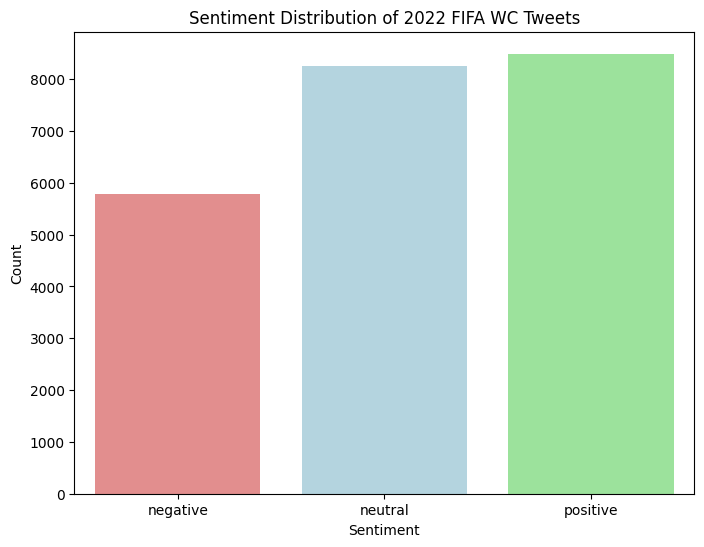

In [182]:
# Define the color palette and order of the sentiment bars
palette = {'positive': 'lightgreen', 'neutral': 'lightblue', 'negative': 'lightcoral'}
order = ['negative', 'neutral', 'positive']

# Sentiment distribution bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=fifa_tweets, palette=palette, order=order, dodge=False)
plt.title("Sentiment Distribution of 2022 FIFA WC Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.savefig("../plots/sentiment_dist.png")

plt.show()

There is almost an equal amount of tweets with a positive or neutral sentiment.

### Word Analysis

#### Most Common Words

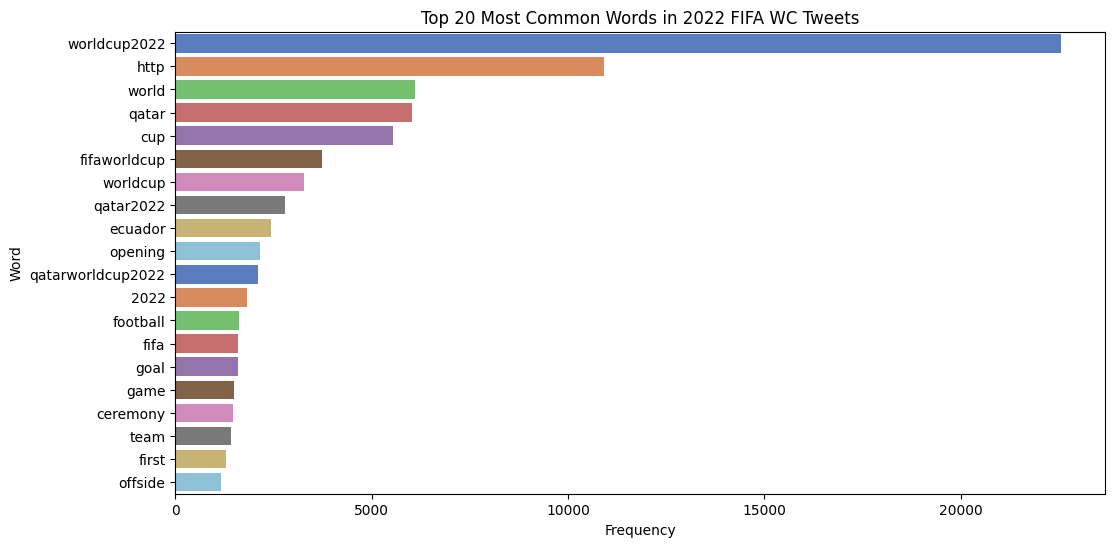

In [170]:
words = word_tokenize(all_tweets)
fdist = FreqDist(words)
top_words = fdist.most_common(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], palette="muted", hue=[word[0] for word in top_words], dodge=False)
plt.title("Top 20 Most Common Words in 2022 FIFA WC Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.savefig("../plots/common_words.png")

plt.show()

Note: `worldcup2022` is the most frequent term in the Most Common Words bar chart and word cloud because all the tweets in this dataset contain it in the form of a hashtag. However, we can see that most of these terms are not explicitaly connected to a positive, negative or neutral sentiment.

#### Word Cloud

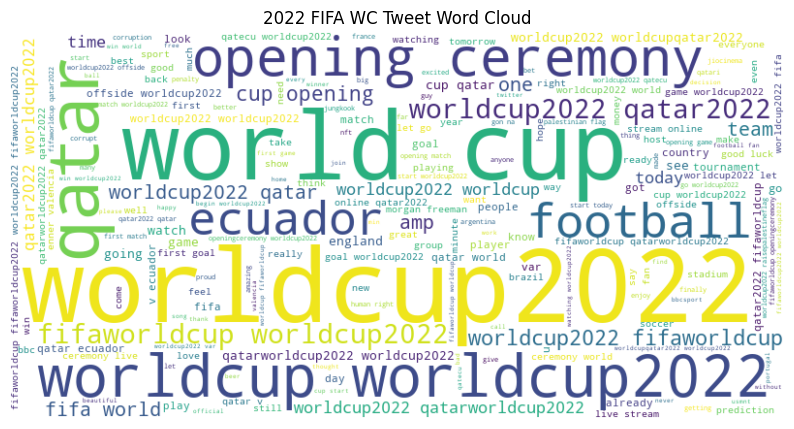

In [171]:
all_tweets = ' '.join(fifa_tweets['ProcessedTweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("2022 FIFA WC Tweet Word Cloud")

plt.savefig("../plots/word_cloud.png")

plt.show()

## Sentiment Analysis Model

We will make four models and see which is more accurate amoung Logistic Regression, SVM, Random Forest and Naive Bayes.

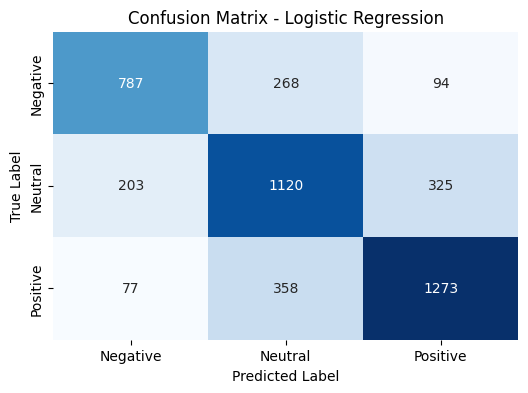

Results for Logistic Regression:
Accuracy: 0.7058823529411765
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.68      0.71      1149
     neutral       0.64      0.68      0.66      1648
    positive       0.75      0.75      0.75      1708

    accuracy                           0.71      4505
   macro avg       0.71      0.70      0.71      4505
weighted avg       0.71      0.71      0.71      4505





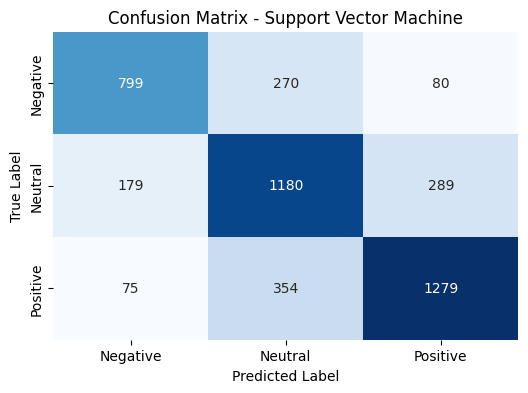

Results for Support Vector Machine:
Accuracy: 0.723196448390677
Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.70      0.73      1149
     neutral       0.65      0.72      0.68      1648
    positive       0.78      0.75      0.76      1708

    accuracy                           0.72      4505
   macro avg       0.73      0.72      0.72      4505
weighted avg       0.73      0.72      0.72      4505





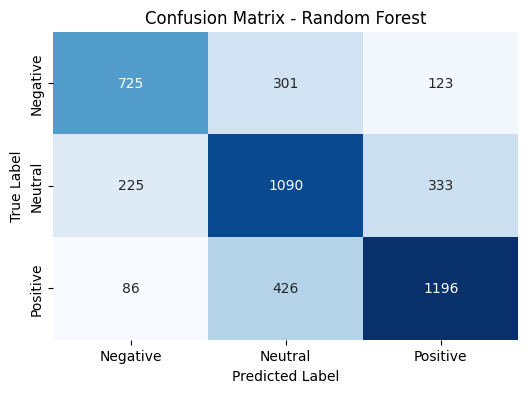

Results for Random Forest:
Accuracy: 0.6683684794672586
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.63      0.66      1149
     neutral       0.60      0.66      0.63      1648
    positive       0.72      0.70      0.71      1708

    accuracy                           0.67      4505
   macro avg       0.67      0.66      0.67      4505
weighted avg       0.67      0.67      0.67      4505





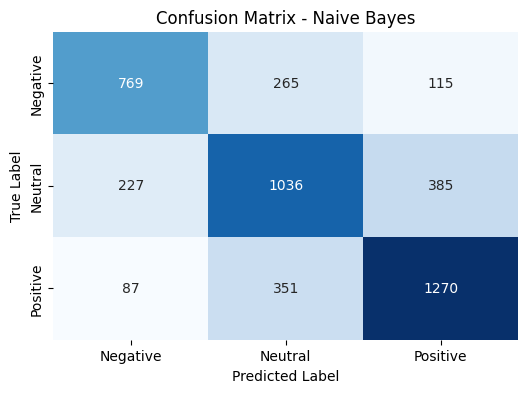

Results for Naive Bayes:
Accuracy: 0.6825749167591565
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.67      0.69      1149
     neutral       0.63      0.63      0.63      1648
    positive       0.72      0.74      0.73      1708

    accuracy                           0.68      4505
   macro avg       0.68      0.68      0.68      4505
weighted avg       0.68      0.68      0.68      4505





In [190]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fifa_tweets['ProcessedTweet'], fifa_tweets['Sentiment'], test_size=0.2, random_state=42)

# Models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
}

# Loop through each model
for model_name, model in models.items():
    # Create a pipeline with TF-IDF vectorizer and the current model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
   
    # Create a confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.savefig(f"../plots/confusion_matrix_{model_name.lower().replace(' ', '_')}.png")

    plt.show()

    # Print the results
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("\n" + "="*50 + "\n")

The most accurate model to predict tweet sentiment is SVM, with 72% accuracy.